## Set up

In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from transformers import AlbertTokenizer, TFAlbertModel
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.regularizers import l1, l2



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
home_dir = Path('/content/drive/MyDrive/266 Final Project/Code')
train_path = home_dir / 'data' / 'train'
val_path = home_dir / 'data' / 'val'
test_path = home_dir / 'data' / 'test'

In [ ]:
#albert model
#https://huggingface.co/docs/transformers/model_doc/albert

albert_tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")
albert_model = TFAlbertModel.from_pretrained("albert-base-v2")

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.weight', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.bias', 'predictions.LayerNorm.bias', 'predictions.dense.weight']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [ ]:

results = {}

for category in (['em', 'in', 'ex', 'ex_aug']):
    X_train = pd.read_csv(train_path / f'X_{category}.csv', delimiter=',')
    # X_train = X_train['response_post']

    results[f'{category}_seeker_wordcount'] = X_train['seeker_post'].str.split().apply(len).describe()
    results[f'{category}_seeker_token_count'] = X_train['seeker_post'].apply(lambda x: len(albert_tokenizer.tokenize(x))).describe()
    results[f'{category}_response_wordcount'] = X_train['response_post'].str.split().apply(len).describe()
    results[f'{category}_response_token_count'] = X_train['response_post'].apply(lambda x: len(albert_tokenizer.tokenize(x))).describe()

    results[f'{category}_seeker_wordcount'] = X_train['seeker_post'].str.split().apply(len).describe()
    results[f'{category}_seeker_token_count'] = X_train['seeker_post'].apply(lambda x: len(albert_tokenizer.tokenize(x))).describe()


summary_table = pd.DataFrame(results)

summary_table = summary_table.transpose()

summary_table



,count,mean,std,min,25%,50%,75%,max
em_seeker_wordcount,1256.0,35.428344,26.695890,7.0,18.00,30.5,46.00,208.0
em_seeker_token_count,1256.0,44.968949,32.935017,8.0,23.00,39.0,57.00,264.0
em_response_wordcount,1256.0,48.544586,73.467111,5.0,14.00,29.0,59.00,1811.0
em_response_token_count,1256.0,60.158439,88.653008,5.0,19.00,36.0,73.00,2149.0
in_seeker_wordcount,1850.0,34.620000,25.158684,6.0,18.00,30.0,45.00,216.0
in_seeker_token_count,1850.0,44.069189,30.792570,8.0,24.00,38.0,56.00,267.0
in_response_wordcount,1850.0,47.835676,69.720736,5.0,14.00,28.0,58.00,1811.0
in_response_token_count,1850.0,59.435676,84.566284,5.0,18.00,35.0,71.75,2149.0
ex_seeker_wordcount,576.0,34.776042,24.005655,6.0,18.00,32.0,44.00,186.0
ex_seeker_token_count,576.0,44.562500,29.487145,8.0,24.00,41.0,56.00,237.0


In [ ]:
MAX_LENGTH = 150
FEATURES = 'response_post'

In [ ]:
def get_target_vectors(category):
    y_train = pd.read_csv((train_path / f'y_{category}.csv'), delimiter=',')
    y_val = pd.read_csv((val_path / f'y_{category}.csv'), delimiter=',')
    y_test = pd.read_csv((test_path / f'y_{category}.csv'), delimiter=',')

    y_train = y_train['empathy']
    y_val = y_val['empathy']
    y_test = y_test['empathy']

    return y_train, y_val, y_test


#no manual adjustment of token_type_ids; everything will be 0
def csv_to_encodings(category, features=FEATURES, max_length=MAX_LENGTH):
    #chunk and pad seeker_post, then add [SEP] to join with response_post

    X_train = pd.read_csv(train_path / f'X_{category}.csv', delimiter=',')
    X_train = X_train[features]
    # X_train_combined = X_train.apply(prepare_text, axis=1)
    train_encodings = albert_tokenizer(list(X_train), truncation=True, padding=True, max_length=max_length, return_tensors='tf')

    X_val = pd.read_csv(val_path / f'X_{category}.csv', delimiter=',')
    X_val = X_val[features]
    # X_val_combined = X_val.apply(prepare_text, axis=1)
    val_encodings = albert_tokenizer(list(X_val), truncation=True, padding=True, max_length=max_length, return_tensors='tf')

    X_test = pd.read_csv(test_path / f'X_{category}.csv', delimiter=',')
    X_test = X_test[features]
    # X_test_combined = X_test.apply(prepare_text, axis=1)
    test_encodings = albert_tokenizer(list(X_test), truncation=True, padding=True, max_length=max_length, return_tensors='tf')

    return train_encodings, val_encodings, test_encodings

### chunking considerations

## Models

In [ ]:
def create_albert_model(model=albert_model,max_length = MAX_LENGTH,
                                 hidden_size = 100,
                                 dropout=0.3,
                                 learning_rate=0.0005):


    model.trainable = False


    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer')
    # token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    albert_inputs = {'input_ids': input_ids,
                #    'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}

    albert_out = model(albert_inputs)

    #pooler_token = bert_out[1]
    cls_token = albert_out[0][:, 0, :]

    hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(cls_token)


    hidden = tf.keras.layers.Dropout(dropout)(hidden)


    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[classification])

    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(),
                                 metrics='accuracy')



    return classification_model

In [ ]:
def run_model(category):
    y_train, y_val, y_test = get_target_vectors(category)

    train_encodings, val_encodings, test_encodings = csv_to_encodings(category)

    print(f'y_train value counts:\n{y_train.value_counts()}')

    print(f'train_encodings:\n{train_encodings}')

    classification = create_albert_model(model=albert_model)
    classification_history = classification.fit([train_encodings.input_ids, train_encodings.attention_mask],
                                                  y_train,
                                                  validation_data=([val_encodings.input_ids, val_encodings.attention_mask],
                                                  y_val),
                                                  batch_size=8,
                                                  epochs=10,
                                                  #class_weight=class_weight
                                                  )

    metrics_columns = ['Category', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

    predictions = classification.predict([test_encodings.input_ids, test_encodings.attention_mask])
    predictions = (predictions >= 0.5).astype(int)


    accuracy = accuracy_score(y_test, predictions)
    print(f"accuracy for test: {accuracy}")
    recall = recall_score(y_test, predictions)
    print(f"recall for test: {recall}")
    precision = precision_score(y_test, predictions)
    print(f"precision for test: {precision}")
    f1 = f1_score(y_test, predictions)
    print(f"f1 score for test: {f1}")

    conf_matrix = confusion_matrix(y_test, predictions)
    print(conf_matrix)

    sns.set(font_scale=1.2)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{category} Confusion Matrix')
    plt.show()


    metrics = {
        'Category': f'{category}short',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    metrics = pd.DataFrame([metrics], columns=metrics_columns)
    return metrics


y_train value counts:
0    629
1    627
Name: empathy, dtype: int64
train_encodings:
{'input_ids': <tf.Tensor: shape=(1256, 150), dtype=int32, numpy=
array([[    2,    31,    22, ...,     0,     0,     0],
       [    2,   101,  1288, ...,     0,     0,     0],
       [    2,    14,  1246, ...,     0,     0,     0],
       ...,
       [    2,    42,    50, ...,     0,     0,     0],
       [    2,    42,  9564, ..., 13169,    20,     3],
       [    2,    30,    32, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1256, 150), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1256, 150), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ...

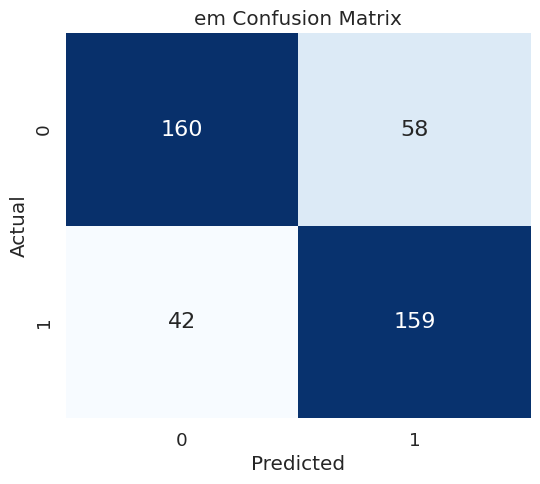

In [ ]:
em_metrics = run_model('em')

y_train value counts:
0    972
1    878
Name: empathy, dtype: int64
train_encodings:
{'input_ids': <tf.Tensor: shape=(1850, 150), dtype=int32, numpy=
array([[   2, 1121,   15, ...,    0,    0,    0],
       [   2,   57,   42, ...,    0,    0,    0],
       [   2,   13,    1, ...,    8,    8,    3],
       ...,
       [   2,  205,    9, ...,    0,    0,    0],
       [   2,   95,   22, ...,    0,    0,    0],
       [   2, 2795,  101, ...,    0,    0,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1850, 150), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1850, 150), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0,

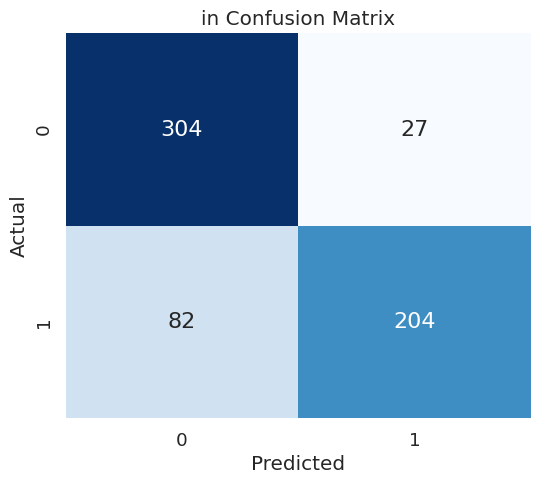

In [ ]:
in_metrics = run_model('in')

y_train value counts:
1    294
0    282
Name: empathy, dtype: int64
train_encodings:
{'input_ids': <tf.Tensor: shape=(576, 150), dtype=int32, numpy=
array([[   2,   31, 2610, ...,    0,    0,    0],
       [   2,   90,  221, ...,    0,    0,    0],
       [   2, 6200,   15, ...,    0,    0,    0],
       ...,
       [   2, 1643,  938, ...,    0,    0,    0],
       [   2,   32,  230, ...,    0,    0,    0],
       [   2, 4148,  860, ...,   16, 2669,    3]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(576, 150), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(576, 150), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0,

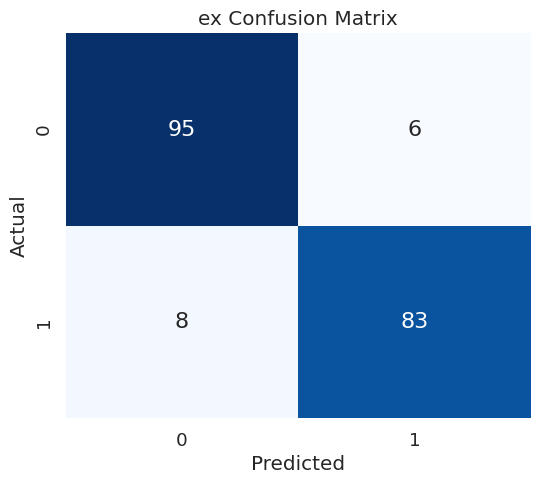

In [ ]:
ex_metrics = run_model('ex')

y_train value counts:
1    498
0    486
Name: empathy, dtype: int64
train_encodings:
{'input_ids': <tf.Tensor: shape=(984, 150), dtype=int32, numpy=
array([[    2,    98,  1364, ...,     0,     0,     0],
       [    2, 10975,   187, ...,     0,     0,     0],
       [    2,    48,  1301, ...,     0,     0,     0],
       ...,
       [    2,   184,   129, ...,     0,     0,     0],
       [    2,    31,  4524, ...,     0,     0,     0],
       [    2,   184,   315, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(984, 150), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(984, 150), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0

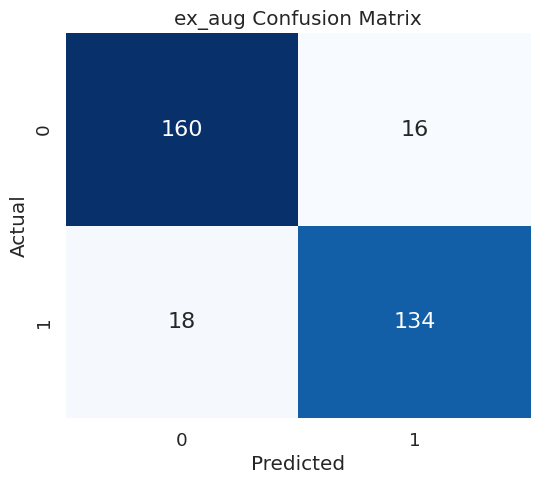

In [ ]:
ex_aug_metrics = run_model('ex_aug')

In [ ]:
metrics = pd.concat([em_metrics, in_metrics, ex_metrics, ex_aug_metrics], ignore_index=True)
print('AlBERT Metrics')
display(metrics)

AlBERT Metrics


,Category,Accuracy,Precision,Recall,F1 Score
0,emshort,0.761337,0.732719,0.791045,0.760766
1,inshort,0.823339,0.883117,0.713287,0.789168
2,exshort,0.927083,0.932584,0.912088,0.922222
3,ex_augshort,0.896341,0.893333,0.881579,0.887417


# EM binary prediction with BERT (seeker + response)

In [ ]:
y_em_train, y_em_val, y_em_test = get_target_vectors('em')
y_em_train.value_counts()

0    629
1    627
Name: empathy, dtype: int64

In [ ]:
train_em_encodings, val_em_encodings, test_em_encodings = csv_to_encodings('em')
train_em_encodings

{'input_ids': <tf.Tensor: shape=(1256, 240), dtype=int32, numpy=
array([[ 101,  146,  112, ...,    0,    0,    0],
       [ 101, 1176, 2288, ...,    0,    0,    0],
       [ 101, 1109, 2501, ...,    0,    0,    0],
       ...,
       [ 101, 1192, 1132, ...,    0,    0,    0],
       [ 101, 1128, 9424, ...,    0,    0,    0],
       [ 101, 1337, 1122, ...,    0,    0,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1256, 240), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1256, 240), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
em_classification = create_bert_binary_model(bert_model=bert_model)
em_classification_history = em_classification.fit([train_em_encodings.input_ids, train_em_encodings.token_type_ids, train_em_encodings.attention_mask],
                                                  y_em_train,
                                                  validation_data=([val_em_encodings.input_ids, val_em_encodings.token_type_ids, val_em_encodings.attention_mask],
                                                  y_em_val),
                                                  batch_size=8,
                                                  epochs=10,
                                                  #class_weight=class_weight_em
                                                  )

Epoch 1/10
157/157 [==============================] - 47s 228ms/step - loss: 0.5677 - accuracy: 0.7046 - val_loss: 0.4872 - val_accuracy: 0.7637
Epoch 2/10
157/157 [==============================] - 36s 227ms/step - loss: 0.4857 - accuracy: 0.7691 - val_loss: 0.4820 - val_accuracy: 0.7900
Epoch 3/10
157/157 [==============================] - 34s 217ms/step - loss: 0.4789 - accuracy: 0.7763 - val_loss: 0.5455 - val_accuracy: 0.7232
Epoch 4/10
157/157 [==============================] - 31s 200ms/step - loss: 0.4725 - accuracy: 0.7779 - val_loss: 0.4667 - val_accuracy: 0.7852
Epoch 5/10
157/157 [==============================] - 32s 203ms/step - loss: 0.4511 - accuracy: 0.7906 - val_loss: 0.4674 - val_accuracy: 0.7757
Epoch 6/10
157/157 [==============================] - 34s 215ms/step - loss: 0.4470 - accuracy: 0.7771 - val_loss: 0.4730 - val_accuracy: 0.7900
Epoch 7/10
157/157 [==============================] - 34s 217ms/step - loss: 0.4381 - accuracy: 0.7858 - val_loss: 0.4811 - val_ac

In [ ]:
predictions_em = em_classification.predict([test_em_encodings.input_ids, test_em_encodings.token_type_ids, test_em_encodings.attention_mask])
predictions_em = (predictions_em >= 0.5).astype(int)

14/14 [==============================] - 10s 517ms/step


In [ ]:
accuracy_em = accuracy_score(y_em_test, predictions_em)
print(f"accuracy for test: {accuracy_em}")
recall_em = recall_score(y_em_test, predictions_em)
print(f"recall for test: {recall_em}")
precision_em = precision_score(y_em_test, predictions_em)
print(f"precision for test: {precision_em}")
f1_em = f1_score(y_em_test, predictions_em)
print(f"f1 score for test: {f1_em}")

accuracy for test: 0.7852028639618138
recall for test: 0.8109452736318408
precision for test: 0.7581395348837209
f1 score for test: 0.783653846153846


[[166  52]
 [ 38 163]]


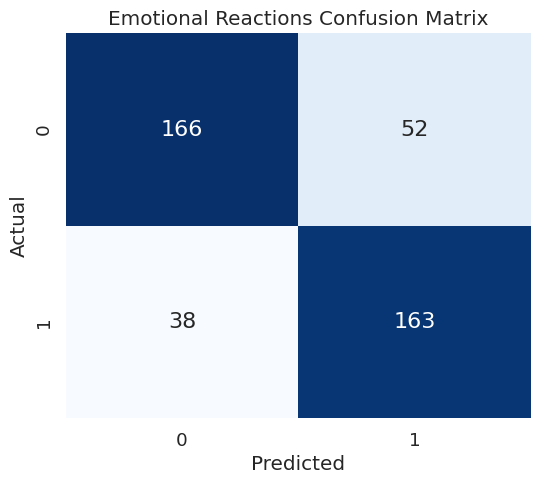

In [ ]:
conf_matrix_em = confusion_matrix(y_em_test, predictions_em)
print(conf_matrix_em)

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_em, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Emotional Reactions Confusion Matrix')
plt.show()

# IN binary prediction

In [ ]:
y_in_train, y_in_val, y_in_test = get_target_vectors('in')
y_in_train.value_counts()

0    972
1    878
Name: empathy, dtype: int64

In [ ]:
train_in_encodings, val_in_encodings, test_in_encodings = csv_to_encodings('in')
train_in_encodings

{'input_ids': <tf.Tensor: shape=(1850, 240), dtype=int32, numpy=
array([[  101,  2140,   117, ...,     0,     0,     0],
       [  101,  4373,  1128, ...,     0,     0,     0],
       [  101,   168,  7595, ...,  4847,  1358,   102],
       ...,
       [  101, 14060,   119, ...,     0,     0,     0],
       [  101,  1284,   112, ...,     0,     0,     0],
       [  101, 10560,  1176, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1850, 240), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1850, 240), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=in

In [ ]:
in_classification = create_bert_binary_model(bert_model=bert_model)
in_classification_history = in_classification.fit([train_in_encodings.input_ids, train_in_encodings.token_type_ids, train_in_encodings.attention_mask],
                                                  y_in_train,
                                                  validation_data=([val_in_encodings.input_ids, val_in_encodings.token_type_ids, val_in_encodings.attention_mask],
                                                  y_in_val),
                                                  batch_size=8,
                                                  epochs=10,
                                                  #class_weight=class_weight_em
                                                  )

Epoch 1/10
232/232 [==============================] - 54s 166ms/step - loss: 0.5720 - accuracy: 0.6924 - val_loss: 0.4928 - val_accuracy: 0.7650
Epoch 2/10
232/232 [==============================] - 31s 135ms/step - loss: 0.4853 - accuracy: 0.7622 - val_loss: 0.4740 - val_accuracy: 0.7828
Epoch 3/10
232/232 [==============================] - 34s 147ms/step - loss: 0.4593 - accuracy: 0.7811 - val_loss: 0.4812 - val_accuracy: 0.7747
Epoch 4/10
232/232 [==============================] - 35s 149ms/step - loss: 0.4537 - accuracy: 0.7800 - val_loss: 0.4698 - val_accuracy: 0.7844
Epoch 5/10
232/232 [==============================] - 34s 149ms/step - loss: 0.4464 - accuracy: 0.7941 - val_loss: 0.4688 - val_accuracy: 0.7909
Epoch 6/10
232/232 [==============================] - 34s 147ms/step - loss: 0.4336 - accuracy: 0.7995 - val_loss: 0.4651 - val_accuracy: 0.7942
Epoch 7/10
232/232 [==============================] - 31s 135ms/step - loss: 0.4225 - accuracy: 0.8011 - val_loss: 0.4860 - val_ac

In [ ]:
predictions_in = in_classification.predict([test_in_encodings.input_ids, test_in_encodings.token_type_ids, test_in_encodings.attention_mask])
predictions_in = (predictions_in >= 0.5).astype(int)

20/20 [==============================] - 10s 313ms/step


In [ ]:
accuracy_in = accuracy_score(y_in_test, predictions_in)
print(f"accuracy for test: {accuracy_in}")
recall_in = recall_score(y_in_test, predictions_in)
print(f"recall for test: {recall_in}")
precision_in = precision_score(y_in_test, predictions_in)
print(f"precision for test: {precision_in}")
f1_in = f1_score(y_in_test, predictions_in)
print(f"f1 score for test: {f1_in}")

[[270  61]
 [ 52 234]]


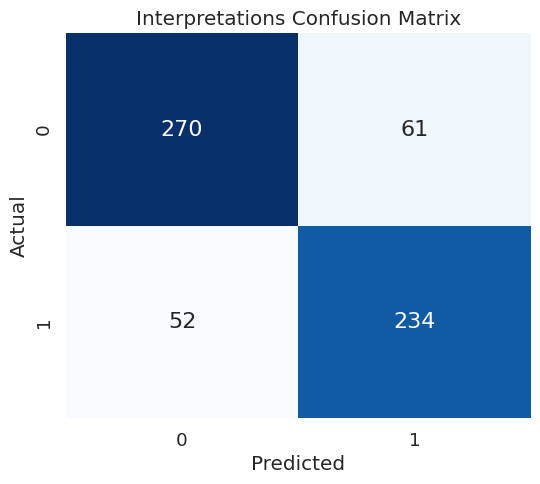

In [ ]:
conf_matrix_in = confusion_matrix(y_in_test, predictions_in)
print(conf_matrix_in)

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_in, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Interpretations Confusion Matrix')
plt.show()

# Ex binary prediction (response)

In [ ]:
y_ex_train, y_ex_val, y_ex_test = get_target_vectors('ex')
y_ex_train.value_counts()

1    294
0    282
Name: empathy, dtype: int64

In [ ]:
train_ex_encodings, val_ex_encodings, test_ex_encodings = csv_to_encodings('ex')
train_ex_encodings

{'input_ids': <tf.Tensor: shape=(576, 150), dtype=int32, numpy=
array([[ 101,  146, 3668, ...,    0,    0,    0],
       [ 101, 1302, 1274, ...,    0,    0,    0],
       [ 101, 7595,  117, ...,    0,    0,    0],
       ...,
       [ 101, 2160, 1936, ...,    0,    0,    0],
       [ 101, 1135, 1281, ...,    0,    0,    0],
       [ 101, 8790, 1910, ..., 9655,  119,  102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(576, 150), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(576, 150), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>}

In [ ]:
ex_classification = create_bert_binary_model(bert_model=bert_model)
ex_classification_history = ex_classification.fit([train_ex_encodings.input_ids, train_ex_encodings.token_type_ids, train_ex_encodings.attention_mask],
                                                  y_ex_train,
                                                  validation_data=([val_ex_encodings.input_ids, val_ex_encodings.token_type_ids, val_ex_encodings.attention_mask],
                                                  y_ex_val),
                                                  batch_size=8,
                                                  epochs=10,
                                                  #class_weight=class_weight_em
                                                  )

Epoch 1/10
72/72 [==============================] - 18s 144ms/step - loss: 0.6357 - accuracy: 0.6441 - val_loss: 0.4504 - val_accuracy: 0.8229
Epoch 2/10
72/72 [==============================] - 9s 120ms/step - loss: 0.4564 - accuracy: 0.8073 - val_loss: 0.3957 - val_accuracy: 0.8385
Epoch 3/10
72/72 [==============================] - 9s 129ms/step - loss: 0.4094 - accuracy: 0.8073 - val_loss: 0.3393 - val_accuracy: 0.8438
Epoch 4/10
72/72 [==============================] - 9s 122ms/step - loss: 0.4000 - accuracy: 0.8316 - val_loss: 0.3553 - val_accuracy: 0.8698
Epoch 5/10
72/72 [==============================] - 9s 119ms/step - loss: 0.3410 - accuracy: 0.8646 - val_loss: 0.3198 - val_accuracy: 0.8385
Epoch 6/10
72/72 [==============================] - 8s 118ms/step - loss: 0.3542 - accuracy: 0.8524 - val_loss: 0.3519 - val_accuracy: 0.8281
Epoch 7/10
72/72 [==============================] - 9s 125ms/step - loss: 0.3582 - accuracy: 0.8333 - val_loss: 0.3256 - val_accuracy: 0.8750
Epoch

In [ ]:
predictions_ex = ex_classification.predict([test_ex_encodings.input_ids, test_ex_encodings.token_type_ids, test_ex_encodings.attention_mask])
predictions_ex = (predictions_ex >= 0.5).astype(int)

In [ ]:
accuracy_ex = accuracy_score(y_ex_test, predictions_ex)
print(f"accuracy for test: {accuracy_ex}")
recall_ex = recall_score(y_ex_test, predictions_ex)
print(f"recall for test: {recall_ex}")
precision_ex = precision_score(y_ex_test, predictions_ex)
print(f"precision for test: {precision_ex}")
f1_ex = f1_score(y_ex_test, predictions_ex)
print(f"f1 score for test: {f1_ex}")

In [ ]:
conf_matrix_ex = confusion_matrix(y_ex_test, predictions_ex)
print(conf_matrix_ex)

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_ex, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Explorations Confusion Matrix')
plt.show()

# Ex aug binary prediction (response)

In [ ]:
y_ex_aug_train, y_ex_aug_val, y_ex_aug_test = get_target_vectors('ex_aug')
y_ex_aug_train.value_counts()

1    498
0    486
Name: empathy, dtype: int64

In [ ]:
train_ex_aug_encodings, val_ex_aug_encodings, test_ex_aug_encodings = csv_to_encodings('ex_aug')
train_ex_aug_encodings

{'input_ids': <tf.Tensor: shape=(984, 150), dtype=int32, numpy=
array([[ 101, 1327, 2228, ...,    0,    0,    0],
       [ 101, 8667,  106, ...,    0,    0,    0],
       [ 101, 1188, 2304, ...,    0,    0,    0],
       ...,
       [ 101, 1731, 1209, ...,    0,    0,    0],
       [ 101,  146, 5340, ...,    0,    0,    0],
       [ 101, 1731, 1385, ...,    0,    0,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(984, 150), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(984, 150), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
ex_aug_classification = create_bert_binary_model(bert_model=bert_model)
ex_aug_classification_history = ex_aug_classification.fit([train_ex_aug_encodings.input_ids, train_ex_aug_encodings.token_type_ids, train_ex_aug_encodings.attention_mask],
                                                  y_ex_aug_train,
                                                  validation_data=([val_ex_aug_encodings.input_ids, val_ex_aug_encodings.token_type_ids, val_ex_aug_encodings.attention_mask],
                                                  y_ex_aug_val),
                                                  batch_size=8,
                                                  epochs=10,
                                                  #class_weight=class_weight_em
                                                  )

Epoch 1/10
123/123 [==============================] - 42s 170ms/step - loss: 0.5384 - accuracy: 0.7083 - val_loss: 0.4150 - val_accuracy: 0.7988
Epoch 2/10
123/123 [==============================] - 17s 138ms/step - loss: 0.4141 - accuracy: 0.8059 - val_loss: 0.3687 - val_accuracy: 0.8323
Epoch 3/10
123/123 [==============================] - 15s 124ms/step - loss: 0.3555 - accuracy: 0.8557 - val_loss: 0.4084 - val_accuracy: 0.7927
Epoch 4/10
123/123 [==============================] - 16s 130ms/step - loss: 0.3476 - accuracy: 0.8638 - val_loss: 0.3518 - val_accuracy: 0.8415
Epoch 5/10
123/123 [==============================] - 17s 141ms/step - loss: 0.3394 - accuracy: 0.8659 - val_loss: 0.3301 - val_accuracy: 0.8384
Epoch 6/10
123/123 [==============================] - 17s 137ms/step - loss: 0.3255 - accuracy: 0.8740 - val_loss: 0.3191 - val_accuracy: 0.8537
Epoch 7/10
123/123 [==============================] - 16s 130ms/step - loss: 0.3075 - accuracy: 0.8791 - val_loss: 0.3193 - val_ac

In [ ]:
predictions_ex_aug = ex_aug_classification.predict([test_ex_aug_encodings.input_ids, test_ex_aug_encodings.token_type_ids, test_ex_aug_encodings.attention_mask])
predictions_ex_aug = (predictions_ex_aug >= 0.5).astype(int)

11/11 [==============================] - 7s 309ms/step


In [ ]:
accuracy_ex_aug = accuracy_score(y_ex_aug_test, predictions_ex_aug)
print(f"accuracy for test: {accuracy_ex_aug}")
recall_ex_aug = recall_score(y_ex_aug_test, predictions_ex_aug)
print(f"recall for test: {recall_ex_aug}")
precision_ex_aug = precision_score(y_ex_aug_test, predictions_ex_aug)
print(f"precision for test: {precision_ex_aug}")
f1_ex_aug = f1_score(y_ex_aug_test, predictions_ex_aug)
print(f"f1 score for test: {f1_ex_aug}")

accuracy for test: 0.8597560975609756
recall for test: 0.8026315789473685
precision for test: 0.8840579710144928
f1 score for test: 0.8413793103448277


[[160  16]
 [ 30 122]]


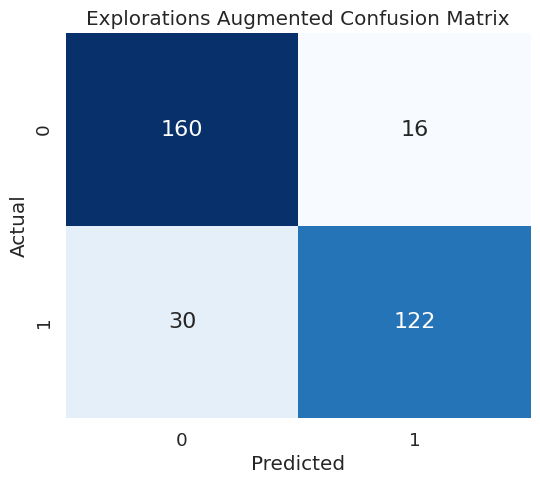

In [ ]:
conf_matrix_ex_aug = confusion_matrix(y_ex_aug_test, predictions_ex_aug)
print(conf_matrix_ex_aug)

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_ex_aug, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Explorations Augmented Confusion Matrix')
plt.show()

# summary

In [ ]:
metrics = {
    'Category': ['em', 'in', 'ex', 'ex_aug'],
    'Accuracy': [accuracy_em, accuracy_in, accuracy_ex, accuracy_ex_aug],
    'Precision': [precision_em, precision_in, precision_ex, precision_ex_aug],
    'Recall': [recall_em, recall_in, recall_ex, recall_ex_aug],
    'F1 Score': [f1_em, f1_in, f1_ex, f1_ex_aug]
}

metrics_df = pd.DataFrame(metrics)

metrics_df

,Category,Accuracy,Precision,Recall,F1 Score
0,em,0.768496,0.837662,0.641791,0.726761
1,in,0.816856,0.793220,0.818182,0.805508
2,ex,0.833333,0.831461,0.813187,0.822222
3,ex_aug,0.859756,0.884058,0.802632,0.841379
